In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import fancyimpute as fi
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from datetime import datetime 

Using TensorFlow backend.


# Task 1: Linear Model and Data Cleaning

For Tasks 1-3 we used the following features: 
'Model Year',
    'Index (Model Type Index)',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 '2Dr Pass Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'Carline Class',
 'Release Date',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 
 'Mfr Name',
 'Division',
 'Verify Mfr Cd',
 '# Cyl',
 'Transmission',
 'Air Aspir Method',
 'Trans',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Max Ethanol % - Gasoline',
 'Fuel Usage  - Conventional Fuel',
 'Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)',
 ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
 ' Fuel2 Usage - Alternative Fuel',
 'Exhaust Valves Per Cyl',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Unique Label?',
 'Label Recalc?',
 'Cyl Deact?',
 'Var Valve Timing?',
 'Var Valve Lift?',
 'Fuel Metering Sys Cd',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)',
 'Stop/Start System (Engine Management System) Code'
 
 Our system for choosing these features is based on domain knowledge of cars, removing the list of features that give away the target and mapping correlations.

In [2]:
d15 = pd.read_excel("2015 FE Guide-for DOE-Mobility Ventures only-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx")
d16 = pd.read_excel("2016 FE Guide for DOE-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx")
d17 = pd.read_excel("2017 FE Guide for DOE-release dates before 9-20-2017-no sales-9-19-2017MercedesCadillacforpublic.xlsx")


In [3]:
d18 = pd.read_excel("2018 FE Guide for DOE-release dates before 2-17-2018-no-sales-2-15-2018public.xlsx")

In [4]:
d18.shape

(1220, 162)

In [5]:
d_test = d18

In [6]:
frames = [d15, d16, d17]
all_years_frame = [d15, d16, d17, d18]

d_all = pd.concat(all_years_frame)
d_train = pd.concat(frames)

In [65]:
y_tr = d_train['Comb Unrd Adj FE - Conventional Fuel']
y_te = d18['Comb Unrd Adj FE - Conventional Fuel']

d_train.shape


(3701, 162)

In [8]:
#Finding number of numerical categories
num_cols = d_train._get_numeric_data().columns

In [9]:
num_cols.shape

(86,)

In [10]:
d_all.shape

(4921, 162)

In [11]:
d_temp = d_all[['Model Year',
    'Index (Model Type Index)',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 '2Dr Pass Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'Carline Class',
 'Release Date',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 
 'Mfr Name',
 'Division',
 'Verify Mfr Cd',
 '# Cyl',
 'Transmission',
 'Air Aspir Method',
 'Trans',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Max Ethanol % - Gasoline',
 'Fuel Usage  - Conventional Fuel',
 'Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)',
 ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
 ' Fuel2 Usage - Alternative Fuel',
 'Exhaust Valves Per Cyl',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Unique Label?',
 'Label Recalc?',
 'Cyl Deact?',
 'Var Valve Timing?',
 'Var Valve Lift?',
 'Fuel Metering Sys Cd',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)',
 'Stop/Start System (Engine Management System) Code']]

In [12]:
d_tr = d_train[['Model Year',
    'Index (Model Type Index)',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 '2Dr Pass Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'Carline Class',
 'Release Date',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 'Mfr Name',
 'Division',
 'Verify Mfr Cd',
 '# Cyl',
 'Transmission',
 'Air Aspir Method',
 'Trans',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Max Ethanol % - Gasoline',
 'Fuel Usage  - Conventional Fuel',
 'Eng Displ',
 ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
 ' Fuel2 Usage - Alternative Fuel',
 'Exhaust Valves Per Cyl',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Unique Label?',
 'Label Recalc?',
 'Cyl Deact?',
 'Var Valve Timing?',
 'Var Valve Lift?',
 'Fuel Metering Sys Cd',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)',
 'Stop/Start System (Engine Management System) Code']]

In [13]:
d_te = d_test[['Model Year',
    'Index (Model Type Index)',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 '2Dr Pass Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',
 'Fuel2 Annual Fuel Cost - Alternative Fuel',
 'Carline Class',
 'Release Date',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 'Mfr Name',
 'Division',
 'Verify Mfr Cd',
 '# Cyl',
 'Transmission',
 'Air Aspir Method',
 'Trans',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Max Ethanol % - Gasoline',
 'Fuel Usage  - Conventional Fuel',
 'Eng Displ',
 ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
 ' Fuel2 Usage - Alternative Fuel',
 'Exhaust Valves Per Cyl',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Unique Label?',
 'Label Recalc?',
 'Cyl Deact?',
 'Var Valve Timing?',
 'Var Valve Lift?',
 'Fuel Metering Sys Cd',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)',
 'Stop/Start System (Engine Management System) Code']]

In [14]:
d_tr.shape
d_tr_cat = d_tr.select_dtypes(include = ['object'])
d_tr_num = d_tr.select_dtypes(exclude = ['object'])

In [15]:
d_te.shape
d_te_cat = d_te.select_dtypes(include = ['object'])
d_te_num = d_te.select_dtypes(exclude = ['object'])

In [16]:
d_tr_num = d_tr_num.drop(['Model Year','Carline Class','# Cyl','# Gears',
                      'Max Ethanol % - Gasoline','Exhaust Valves Per Cyl','Release Date' ],axis = 1)

In [17]:
d_tr_num.head()

,Index (Model Type Index),2Dr Pass Vol,4Dr Pass Vol,4Dr Lugg Vol,Htchbk Pass Vol,Htchbk Lugg Vol,Fuel2 Annual Fuel Cost - Alternative Fuel,$ You Save over 5 years (amount saved in fuel costs over 5 years - on label),Eng Displ
0,264,NaN,NaN,NaN,NaN,NaN,NaN,750.0,1.8
1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7


In [18]:
d_te_num = d_te_num.drop(['Model Year','Carline Class','# Cyl','# Gears',
                      'Max Ethanol % - Gasoline','Exhaust Valves Per Cyl','Release Date' ],axis = 1)

In [19]:
col_list = ['Model Year','Carline Class','# Cyl','# Gears',
                      'Max Ethanol % - Gasoline','Exhaust Valves Per Cyl']

In [20]:
for i in col_list:
    d_tr_cat[i]=d_tr[i]

In [21]:
for i in col_list:
    d_te_cat[i]=d_te[i]

In [22]:
d_tr_cat.head()

,Range1 - Model Type Driving Range - Conventional Fuel,Mfr Name,Division,Verify Mfr Cd,Transmission,Air Aspir Method,Trans,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,...,Fuel Metering Sys Cd,Off Board Charge Capable (Y or N),Camless Valvetrain (Y or N),Stop/Start System (Engine Management System) Code,Model Year,Carline Class,# Cyl,# Gears,Max Ethanol % - Gasoline,Exhaust Valves Per Cyl
0,NaN,FCA Italy,Alfa Romeo,FTG,Auto(AM6),TC,AM,Y,N,R,...,GDI,NaN,N,N,2015,1,4,6,10.0,2
1,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,12,7,10.0,2
2,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,8,7,10.0,2
3,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Manual(M6),NaN,M,N,N,R,...,MFI,NaN,N,N,2015,1,8,6,10.0,2
4,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,8,7,10.0,2


In [23]:
d_te_cat.head()

,Range1 - Model Type Driving Range - Conventional Fuel,Mfr Name,Division,Verify Mfr Cd,Transmission,Air Aspir Method,Trans,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,...,Fuel Metering Sys Cd,Off Board Charge Capable (Y or N),Camless Valvetrain (Y or N),Stop/Start System (Engine Management System) Code,Model Year,Carline Class,# Cyl,# Gears,Max Ethanol % - Gasoline,Exhaust Valves Per Cyl
0,NaN,Honda,Acura,HNX,Auto(AM-S9),TC,AMS,Y,N,A,...,GDI,N,N,Y,2018,1,6,9,10.0,2
1,NaN,FCA US LLC,ALFA ROMEO,CRX,Auto(AM6),TC,AM,Y,N,R,...,GDI,NaN,N,N,2018,1,4,6,10.0,2
2,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,A,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2
3,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,R,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2
4,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,A,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2


In [24]:
d_tr_num.dtypes

Index (Model Type Index)                                                           int64
2Dr Pass Vol                                                                     float64
4Dr Pass Vol                                                                     float64
4Dr Lugg Vol                                                                     float64
Htchbk Pass Vol                                                                  float64
Htchbk Lugg Vol                                                                  float64
Fuel2 Annual Fuel Cost - Alternative Fuel                                        float64
$ You Save over 5 years (amount saved in fuel costs over 5 years - on label)     float64
Eng Displ                                                                        float64
dtype: object

In [25]:
d_te_num.dtypes

Index (Model Type Index)                                                           int64
2Dr Pass Vol                                                                     float64
4Dr Pass Vol                                                                     float64
4Dr Lugg Vol                                                                     float64
Htchbk Pass Vol                                                                  float64
Htchbk Lugg Vol                                                                  float64
Fuel2 Annual Fuel Cost - Alternative Fuel                                        float64
$ You Save over 5 years (amount saved in fuel costs over 5 years - on label)     float64
Eng Displ                                                                        float64
dtype: object

In [26]:
d_tr_num = d_tr_num.reset_index(drop=True)

In [27]:
d_te_num = d_te_num.reset_index(drop=True)

In [28]:
#d_tr_num = d_tr_num.drop(["Release Date"], axis = 1)

In [29]:
# for i in range(len(d_tr_num['Release Date'])):
#     d_tr_num['Release Date'][i] = datetime.strptime(str(d_tr_num['Release Date'][i]).split(".")[0], '%Y-%m-%d %H:%M:%S').date().toordinal()
#     print(i)

In [192]:
d_tr_num.head

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                          264           NaN           NaN           NaN   
1                            8           NaN           NaN           NaN   
2                            4           NaN           NaN           NaN   
3                            1           NaN           NaN           NaN   
4                            5           NaN           NaN           NaN   
5                            2           NaN           NaN           NaN   
6                            6           NaN           NaN           NaN   
7                            3           NaN           NaN           NaN   
8                           27           NaN           NaN           NaN   
9                           29           NaN           NaN           NaN   
10                          35           NaN           NaN           NaN   
11                          33           NaN           NaN

In [193]:
d_te_num.head

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                           57           NaN           NaN           NaN   
1                          410           NaN           NaN           NaN   
2                           65           NaN           NaN           NaN   
3                           71           NaN           NaN           NaN   
4                           66           NaN           NaN           NaN   
5                           72           NaN           NaN           NaN   
6                           46           NaN           NaN           NaN   
7                          488           NaN           NaN           NaN   
8                           38           NaN           NaN           NaN   
9                          278           NaN           NaN           NaN   
10                         223           NaN           NaN           NaN   
11                         285           NaN           NaN

In [32]:
from sklearn.preprocessing import Imputer

imp_num = Imputer(strategy = 'median').fit(d_tr_num)

In [33]:
from sklearn.preprocessing import Imputer

imp_num_t = Imputer(strategy = 'median').fit(d_te_num)

In [34]:
X_tr_imp = imp_num.transform(d_tr_num)

In [35]:
X_te_imp = imp_num_t.transform(d_te_num)

In [36]:
X_tr_num = pd.DataFrame(X_tr_imp, columns=d_tr_num.columns)

In [37]:
X_te_num = pd.DataFrame(X_te_imp, columns=d_te_num.columns)

In [194]:
X_tr_num.head

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                        264.0          83.0          98.0          14.0   
1                          8.0          83.0          98.0          14.0   
2                          4.0          83.0          98.0          14.0   
3                          1.0          83.0          98.0          14.0   
4                          5.0          83.0          98.0          14.0   
5                          2.0          83.0          98.0          14.0   
6                          6.0          83.0          98.0          14.0   
7                          3.0          83.0          98.0          14.0   
8                         27.0          83.0          98.0          14.0   
9                         29.0          83.0          98.0          14.0   
10                        35.0          83.0          98.0          14.0   
11                        33.0          83.0          98.0

In [195]:
X_te_num.head

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                         57.0          83.0          99.0          14.0   
1                        410.0          83.0          99.0          14.0   
2                         65.0          83.0          99.0          14.0   
3                         71.0          83.0          99.0          14.0   
4                         66.0          83.0          99.0          14.0   
5                         72.0          83.0          99.0          14.0   
6                         46.0          83.0          99.0          14.0   
7                        488.0          83.0          99.0          14.0   
8                         38.0          83.0          99.0          14.0   
9                        278.0          83.0          99.0          14.0   
10                       223.0          83.0          99.0          14.0   
11                       285.0          83.0          99.0

In [40]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

scaler.fit(X_tr_num)

X_tr_num_sc = scaler.transform(X_tr_num)



In [41]:
X_te_num_sc = scaler.transform(X_te_num)

In [42]:
X_tr_num_sc = pd.DataFrame(X_tr_num_sc, columns=X_tr_num.columns)

In [43]:
X_te_num_sc = pd.DataFrame(X_te_num_sc, columns=X_te_num.columns)

In [196]:
X_tr_num_sc.head #train data numerical scaled

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                     0.249234      0.014368     -0.050836     -0.173528   
1                    -0.907082      0.014368     -0.050836     -0.173528   
2                    -0.925150      0.014368     -0.050836     -0.173528   
3                    -0.938700      0.014368     -0.050836     -0.173528   
4                    -0.920633      0.014368     -0.050836     -0.173528   
5                    -0.934184      0.014368     -0.050836     -0.173528   
6                    -0.916116      0.014368     -0.050836     -0.173528   
7                    -0.929667      0.014368     -0.050836     -0.173528   
8                    -0.821262      0.014368     -0.050836     -0.173528   
9                    -0.812228      0.014368     -0.050836     -0.173528   
10                   -0.785127      0.014368     -0.050836     -0.173528   
11                   -0.794161      0.014368     -0.050836

In [197]:
X_te_num_sc.head

<bound method NDFrame.head of       Index (Model Type Index)  2Dr Pass Vol  4Dr Pass Vol  4Dr Lugg Vol  \
0                    -0.685756      0.014368      0.174215     -0.173528   
1                     0.908696      0.014368      0.174215     -0.173528   
2                    -0.649621      0.014368      0.174215     -0.173528   
3                    -0.622520      0.014368      0.174215     -0.173528   
4                    -0.645104      0.014368      0.174215     -0.173528   
5                    -0.618003      0.014368      0.174215     -0.173528   
6                    -0.735442      0.014368      0.174215     -0.173528   
7                     1.261011      0.014368      0.174215     -0.173528   
8                    -0.771577      0.014368      0.174215     -0.173528   
9                     0.312470      0.014368      0.174215     -0.173528   
10                    0.064043      0.014368      0.174215     -0.173528   
11                    0.344088      0.014368      0.174215

In [46]:
d_tr_cat.head()

,Range1 - Model Type Driving Range - Conventional Fuel,Mfr Name,Division,Verify Mfr Cd,Transmission,Air Aspir Method,Trans,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,...,Fuel Metering Sys Cd,Off Board Charge Capable (Y or N),Camless Valvetrain (Y or N),Stop/Start System (Engine Management System) Code,Model Year,Carline Class,# Cyl,# Gears,Max Ethanol % - Gasoline,Exhaust Valves Per Cyl
0,NaN,FCA Italy,Alfa Romeo,FTG,Auto(AM6),TC,AM,Y,N,R,...,GDI,NaN,N,N,2015,1,4,6,10.0,2
1,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,12,7,10.0,2
2,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,8,7,10.0,2
3,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Manual(M6),NaN,M,N,N,R,...,MFI,NaN,N,N,2015,1,8,6,10.0,2
4,NaN,aston martin,Aston Martin Lagonda Ltd,ASX,Auto(AM7),NaN,AM,N,N,R,...,MFI,NaN,N,N,2015,1,8,7,10.0,2


In [47]:
d_te_cat.head()

,Range1 - Model Type Driving Range - Conventional Fuel,Mfr Name,Division,Verify Mfr Cd,Transmission,Air Aspir Method,Trans,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,...,Fuel Metering Sys Cd,Off Board Charge Capable (Y or N),Camless Valvetrain (Y or N),Stop/Start System (Engine Management System) Code,Model Year,Carline Class,# Cyl,# Gears,Max Ethanol % - Gasoline,Exhaust Valves Per Cyl
0,NaN,Honda,Acura,HNX,Auto(AM-S9),TC,AMS,Y,N,A,...,GDI,N,N,Y,2018,1,6,9,10.0,2
1,NaN,FCA US LLC,ALFA ROMEO,CRX,Auto(AM6),TC,AM,Y,N,R,...,GDI,NaN,N,N,2018,1,4,6,10.0,2
2,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,A,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2
3,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,R,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2
4,NaN,Volkswagen Group of,Audi,VGA,Auto(AM-S7),NaN,AMS,Y,N,A,...,GDPI,NaN,N,N,2018,1,10,7,15.0,2


In [48]:
d_tr_cat = d_tr_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [49]:
d_te_cat = d_te_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [50]:
d_tr_cat.isna().any()

Range1 - Model Type Driving Range - Conventional Fuel            False
Mfr Name                                                         False
Division                                                         False
Verify Mfr Cd                                                    False
Transmission                                                     False
Air Aspir Method                                                 False
Trans                                                            False
Lockup Torque Converter                                          False
Trans Creeper Gear                                               False
Drive Sys                                                        False
Fuel Usage  - Conventional Fuel                                  False
 Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel    False
 Fuel2 Usage - Alternative Fuel                                  False
Car/Truck Category - Cash for Clunkers Bill.                     False
Unique

In [51]:
d_te_cat.isna().any()

Range1 - Model Type Driving Range - Conventional Fuel            False
Mfr Name                                                         False
Division                                                         False
Verify Mfr Cd                                                    False
Transmission                                                     False
Air Aspir Method                                                 False
Trans                                                            False
Lockup Torque Converter                                          False
Trans Creeper Gear                                               False
Drive Sys                                                        False
Fuel Usage  - Conventional Fuel                                  False
 Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel    False
 Fuel2 Usage - Alternative Fuel                                  False
Car/Truck Category - Cash for Clunkers Bill.                     False
Unique

In [52]:
d_tr_cat.isnull().any()

Range1 - Model Type Driving Range - Conventional Fuel            False
Mfr Name                                                         False
Division                                                         False
Verify Mfr Cd                                                    False
Transmission                                                     False
Air Aspir Method                                                 False
Trans                                                            False
Lockup Torque Converter                                          False
Trans Creeper Gear                                               False
Drive Sys                                                        False
Fuel Usage  - Conventional Fuel                                  False
 Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel    False
 Fuel2 Usage - Alternative Fuel                                  False
Car/Truck Category - Cash for Clunkers Bill.                     False
Unique

In [53]:
d_tr_cat_dummied = pd.get_dummies(d_tr_cat, columns = list(d_tr_cat))

In [54]:
d_te_cat_dummied = pd.get_dummies(d_te_cat, columns = list(d_te_cat))

In [55]:
print(X_tr_num_sc.shape)
d_tr_cat_dummied.shape

(3701, 9)


(3701, 373)

In [56]:
print(X_te_num_sc.shape)
d_te_cat_dummied.shape

(1220, 9)


(1220, 274)

In [57]:
X_tr_num_sc = pd.DataFrame(X_tr_num_sc, columns=X_tr_num.columns)
missing_cols = set( d_tr_cat_dummied.columns ) - set( d_te_cat_dummied.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    d_te_cat_dummied[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
d_te_cat_dummied2 = d_te_cat_dummied[pd.DataFrame(d_tr_cat_dummied).columns]

In [58]:
d_te_cat_dummied2.shape

(1220, 373)

In [59]:
X_tr_complete = np.append(X_tr_num_sc, d_tr_cat_dummied, axis = 1)

In [60]:
X_te_complete = np.append(X_te_num_sc, d_te_cat_dummied2, axis = 1)

In [61]:
X_tr_complete.shape

(3701, 382)

In [62]:
X_te_complete.shape

(1220, 382)

Plotting the distribution of the target

In [63]:
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


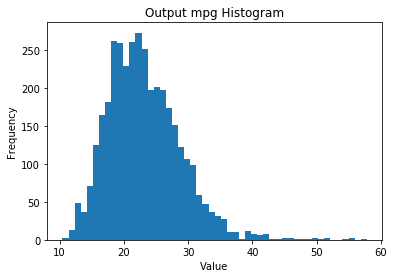

In [67]:
#gaussian_numbers = np.random.randn(1000)
plt.hist(y_tr, bins=50)
plt.title("Output mpg Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.boxplot(y_train)
fig = plt.gcf()

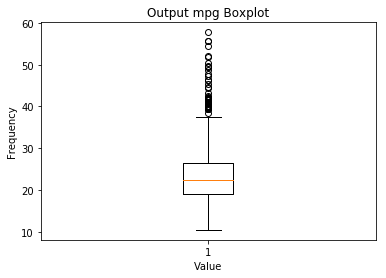

In [68]:
plt.boxplot(y_tr)
plt.title("Output mpg Boxplot")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

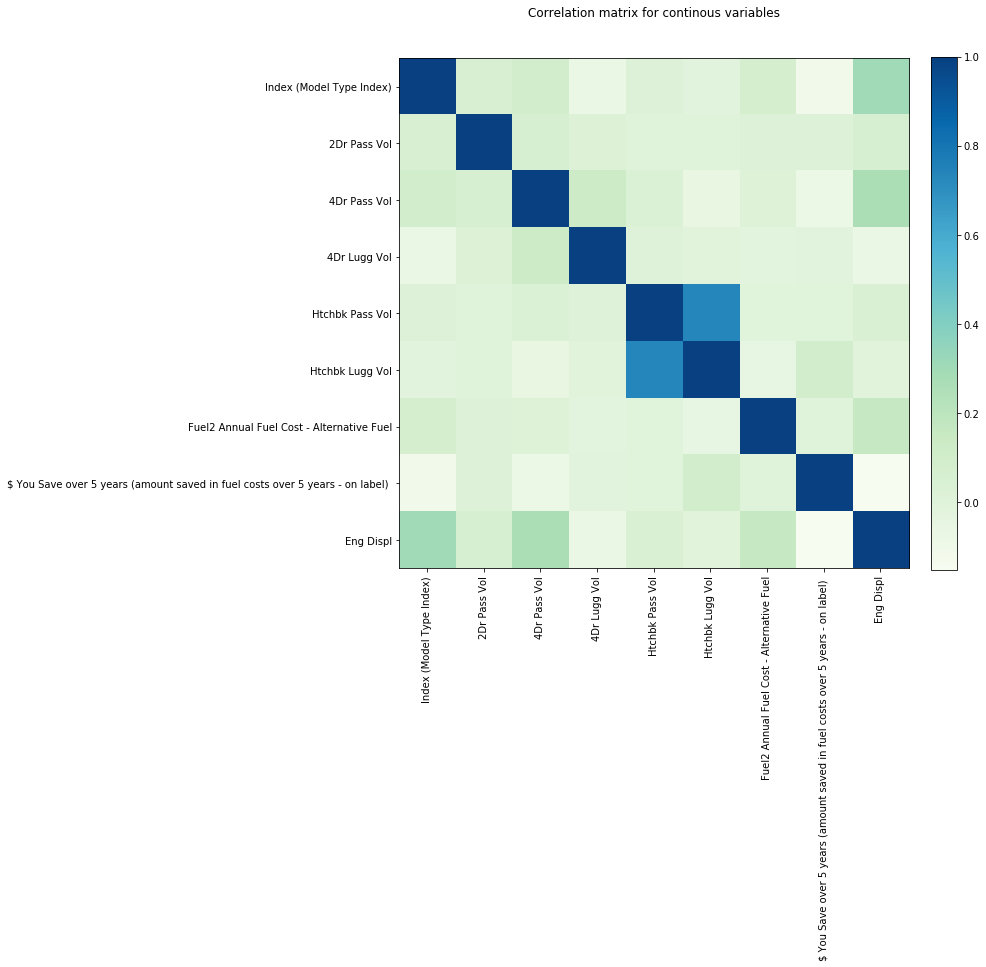

In [69]:
num_cols = X_tr_num.columns
plt.matshow(X_tr_num[num_cols].corr(), cmap='GnBu')
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.gca()
ax.set_xticklabels(num_cols, rotation = 'vertical')
ax.set_xticks(np.arange(len(num_cols)))
ax.title.set_position([.5, 1.07]) #this adjusts title position. tune 1.07 
ax.set_yticklabels(num_cols)
ax.set_yticks(np.arange(len(num_cols)))
plt.title('Correlation matrix for continous variables')
plt.colorbar(fraction=0.046, pad=0.04) 
ax.xaxis.set_ticks_position('bottom') 
plt.show()

In [70]:
y_tr = d_train['Comb Unrd Adj FE - Conventional Fuel']
y_te = d18['Comb Unrd Adj FE - Conventional Fuel']

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_ridge = {'alpha': np.logspace(-3, 3, 13)}
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=10)
grid_ridge.fit(X_tr_complete,y_tr)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 3.1622776601683795}
0.873000596902198


In [90]:
print("The test score for Ridge Linear Model is "+str(grid_ridge.score(X_te_complete,y_te)))

The test score for Ridge Linear Model is 0.8340506110223106


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_lasso = {'alpha': np.logspace(-3, 3, 13)}
grid_lasso = GridSearchCV(Lasso(), param_lasso, cv=10)
grid_lasso.fit(X_tr_complete,y_tr)
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 0.001}
0.8720437508945863


In [92]:
print("The test score for Lasso Linear Model is "+str(grid_lasso.score(X_te_complete,y_te)))

The test score for Lasso Linear Model is 0.8517965884325657


Thus Lasso performs better than Ridge in linear case

# Task 2

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
poly = PolynomialFeatures()
X_tr_num_poly = poly.fit_transform(X_tr_num)
X_te_num_poly = poly.transform(X_te_num)

In [84]:
scaler = StandardScaler()
X_tr_num_poly_sc = scaler.fit_transform(X_tr_num_poly)
X_te_num_poly_sc = scaler.transform(X_te_num_poly)

In [85]:
X_tr_complete_poly = np.append(X_tr_num_poly_sc, d_tr_cat_dummied, axis = 1)
X_te_complete_poly = np.append(X_te_num_poly_sc, d_te_cat_dummied2, axis = 1)


In [86]:
X_tr_complete_poly.shape

(3701, 428)

In [87]:
param_ridge = {'alpha': np.logspace(-3, 3, 15)}
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=10)
grid_ridge.fit(X_tr_complete_poly,y_tr)
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 0.3727593720314938}
0.8902003054510154


In [88]:
print("The test score for Ridge Linear Model is "+str(grid_ridge.score(X_te_complete_poly,y_te)))

The test score for Ridge Linear Model is 0.8254235214509167


 We notice that Polynomial features is causing the data to overfit

# Task 3 

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [123]:
gb_grid = GridSearchCV(GradientBoostingRegressor(max_features=50, max_depth = 2,min_samples_leaf = 50), param_grid = {'n_estimators':[ 700 ,800, 900]}, cv=5)
gb_grid.fit(X_tr_complete,y_tr)
print(gb_grid.best_params_)
print(gb_grid.best_score_)

{'n_estimators': 900}
0.9142360664487958


In [124]:
gb_grid.score(X_te_complete,y_te)

0.7286508818607985

Gradient Boosting seems to overfit the data a lot. We will attempt to make a grid search to find best parameters that don't underfit the model'

In [128]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4]}


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_tr_complete, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=30, min_samples_split=5, min_samples_leaf=1, n_estimators=400, max_features=sqrt, bootstrap=True 
[CV] max_depth=30, min_samples_split=5, min_samples_leaf=1, n_estimators=400, max_features=sqrt, bootstrap=True 
[CV] max_depth=30, min_samples_split=5, min_samples_leaf=1, n_estimators=400, max_features=sqrt, bootstrap=True 
[CV] max_depth=10, min_samples_split=5, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, bootstrap=True 
[CV]  max_depth=30, min_samples_split=5, min_samples_leaf=1, n_estimators=400, max_features=sqrt, bootstrap=True, total=   6.1s
[CV] max_depth=10, min_samples_split=5, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, bootstrap=True 
[CV]  max_depth=30, min_samples_split=5, min_samples_leaf=1, n_estimators=400, max_features=sqrt, bootstrap=True, total=   6.2s
[CV] max_depth=10, min_samples_split=5, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, bootstrap=True 


[CV] max_depth=90, min_samples_split=5, min_samples_leaf=1, n_estimators=800, max_features=sqrt, bootstrap=False 
[CV]  max_depth=90, min_samples_split=5, min_samples_leaf=1, n_estimators=800, max_features=sqrt, bootstrap=False, total=  35.3s
[CV] max_depth=10, min_samples_split=10, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.2min


[CV]  max_depth=90, min_samples_split=5, min_samples_leaf=1, n_estimators=800, max_features=sqrt, bootstrap=False, total=  30.9s
[CV] max_depth=10, min_samples_split=10, min_samples_leaf=1, n_estimators=2000, max_features=sqrt, bootstrap=False 


KeyboardInterrupt: 

In [177]:
rf_grid = GridSearchCV(RandomForestRegressor(max_features =45), param_grid = {'n_estimators':[90,100,105,110,115]}, cv=5)
rf_grid.fit(X_tr_complete,y_tr)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'n_estimators': 90}
0.9457666197587219


In [178]:
rf_grid.score(X_te_complete,y_te)

0.8812460315714362

# Task 4

In [179]:
rf_grid.best_estimator_.feature_importances_

array([2.41755855e-02, 2.05651041e-03, 2.13574119e-02, 1.00172349e-02,
       7.29946323e-03, 6.49493257e-03, 5.62503254e-04, 1.47017682e-01,
       1.86390106e-01, 5.75697362e-07, 5.88611925e-07, 2.09484341e-08,
       6.28058894e-07, 6.66013968e-06, 1.81446732e-06, 1.42174874e-07,
       4.93685447e-07, 3.29638490e-06, 7.27004696e-06, 4.32823784e-06,
       6.67369396e-05, 3.63762407e-06, 8.57635666e-07, 2.07697537e-06,
       2.54703136e-06, 5.25054782e-06, 4.54075069e-06, 9.63392921e-07,
       1.63925125e-06, 4.21148769e-07, 3.76106265e-06, 7.14894422e-06,
       1.55398935e-04, 6.97681488e-05, 1.04539321e-05, 2.41531326e-07,
       3.83974228e-07, 1.43586640e-06, 1.30214396e-06, 1.09610325e-05,
       1.56599779e-05, 8.78547930e-08, 5.05976513e-07, 2.02697081e-06,
       3.48398227e-06, 5.51768153e-06, 4.93115083e-07, 7.84726648e-06,
       4.04833558e-06, 1.16976024e-05, 3.83136477e-07, 9.64098289e-08,
       2.09924738e-07, 1.85559432e-05, 1.31493832e-07, 2.75835649e-07,
      

In [181]:
X_tr_com_cols = list(X_tr_num_sc) + list(d_tr_cat_dummied)

In [182]:
len(X_tr_com_cols)

382

In [183]:
imp__feat_list = sorted(zip(map(lambda x: round(x, 4), rf_grid.best_estimator_.feature_importances_), X_tr_com_cols), 
             reverse=True)

In [184]:
imp__feat_list

[(0.1864, 'Eng Displ'),
 (0.147,
  '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) '),
 (0.0957, '# Cyl_4'),
 (0.0669, '# Cyl_8'),
 (0.0632, 'Drive Sys_F'),
 (0.0286, '# Cyl_6'),
 (0.0242, 'Index (Model Type Index)'),
 (0.0214, '4Dr Pass Vol'),
 (0.0157, '# Gears_1'),
 (0.0152, 'Transmission_Auto(AV)'),
 (0.0151, 'Stop/Start System (Engine Management System) Code_Y'),
 (0.0147, 'Stop/Start System (Engine Management System) Code_N'),
 (0.0136, 'Drive Sys_R'),
 (0.0135, '# Cyl_12'),
 (0.0125, 'Exhaust Valves Per Cyl_2'),
 (0.0106, 'Trans_CVT'),
 (0.01, '4Dr Lugg Vol'),
 (0.0073, 'Htchbk Pass Vol'),
 (0.007, 'Transmission_Auto(AM6)'),
 (0.0065, 'Htchbk Lugg Vol'),
 (0.0065, 'Carline Class_5'),
 (0.0064, 'Exhaust Valves Per Cyl_1'),
 (0.0061, 'Lockup Torque Converter_N'),
 (0.0061, '# Cyl_3'),
 (0.0059, 'Lockup Torque Converter_Y'),
 (0.0059, 'Carline Class_33'),
 (0.0054, 'Drive Sys_A'),
 (0.005, 'Cyl Deact?_N'),
 (0.0044, 'Trans_A'),
 (0.0043, 'Max Ethanol %

In [185]:
top_20 = []
for i in range(20):
    top_20.append(imp__feat_list[i][1])

In [186]:
top_20

['Eng Displ',
 '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 '# Cyl_4',
 '# Cyl_8',
 'Drive Sys_F',
 '# Cyl_6',
 'Index (Model Type Index)',
 '4Dr Pass Vol',
 '# Gears_1',
 'Transmission_Auto(AV)',
 'Stop/Start System (Engine Management System) Code_Y',
 'Stop/Start System (Engine Management System) Code_N',
 'Drive Sys_R',
 '# Cyl_12',
 'Exhaust Valves Per Cyl_2',
 'Trans_CVT',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Transmission_Auto(AM6)',
 'Htchbk Lugg Vol']

In [187]:
X_tr_col = pd.DataFrame(X_tr_complete, columns = X_tr_com_cols )

In [188]:
X_tr_t20 = X_tr_col[top_20]

In [189]:
X_te_col = pd.DataFrame(X_te_complete, columns = X_tr_com_cols )

In [165]:
X_te_t20 = X_te_col[top_20]

In [190]:
rf_grid2 = GridSearchCV(RandomForestRegressor(), param_grid = {'n_estimators':[90,100,105,110,115]}, cv=5)
rf_grid2.fit(X_tr_t20,y_tr)
print(rf_grid2.best_params_)
print(rf_grid2.best_score_)

{'n_estimators': 105}
0.8802526210741554


In [191]:
rf_grid2.score(X_te_t20,y_te)

0.17618987314803525

The top 20 features seem to grossly overfit the data

We first concatenated the data for 15,16 and 17 into a train set. Eliminated the columns that directly report the target. Next we split the data into numerical and categorical columns. Then we impute each of these splits. Next we scale the numerical one and join the 2 into one single X_train dataframe. Likewise, we used the same process for the test set. However, we fit the scaler according to the train set. Also, we use the same columns as the training the set for the test set. Finally, we use 2 different linear models, followed by a polynomial transform and finally we try the randomforest regressor and gradient boost regression.

# In conclusion, the best test accuracy we get is with Random Forest Regressor at 88.12%